# Simple advection diffusion model for tracer transport model in a stratified ocean

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$$
\frac{dT}{dt} = -\mathbf{v}\cdot\nabla T + \kappa \nabla^2 T
$$

See detailed numerics here: https://computationalthinking.mit.edu/Fall23/climate_science/advection_and_diffusion/

In [60]:
def advection(T, dx, U=0):
    dT = np.zeros(len(T))  # create new vector of the same length
    
    for i in range(1,len(T)-1):
        dT[i] = U * (T[i+1] - T[i-1]) / (2*dx)

    # periodic boundary:
    # dT[0] = U * (T[1] - T[-1]) / (2*dx)
    # dT[-1] = U * (T[0] - T[-2]) / (2*dx)
    # no-flux boundary:
    dT[0] = U * T[1] / (2*dx)
    dT[-1] = U * (-1*T[-2]) / (2*dx)

    return dT

In [62]:
def diffusion(T, dx, D=1e3):
    dT = np.zeros(len(T))  # create new vector of the same length

    for i in range(1,len(T)-1):
        dT[i] = D * (T[i+1] - 2*T[i] + T[i-1]) / (dx**2)

    # periodic boundary:
    # dT[0] = D * (T[1] - 2*T[0] + T[-1]) / (dx**2)
    # dT[-1] = D * (T[0] - 2*T[-1] + T[-2]) / (dx**2)
    # no-flux boundary:
    dT[0] = D * (T[1] - 2*T[0]) / (dx**2)
    dT[-1] = D * (-2*T[-1] + T[-2]) / (dx**2)

    return dT

In [104]:
def verticaldiffusion(T, Tsurf, dz=100, Dv=1e-5):
    dT = np.zeros(len(T))  # create new vector of the same length

    for i in range(1,len(T)-1):
        dT[i] = Dv * (Tsurf[i] - T[i]) / (dz**2)

    return dT

In [106]:
def f_advectiondiffusion(T,t,Tsurf,dx=1e5,dz=1e3,U=1,D=0.01,Dv=1e-5):
    return advection(T,dx,U) + diffusion(T,dx,D) + verticaldiffusion(T,Tsurf,dz,Dv)

In [162]:
def solve_advectiondiffusion(T0,dt,t_total,Tsurf,dx=1e5,dz=1e2,U=0,D=1e3,Dv=1e-5):
    t = np.linspace(0,t_total,int((t_total/dt) + 1))
    T = odeint(f_advectiondiffusion, T0, t, args=(Tsurf,dx,dz,U,D,Dv))
    return T,t

In [164]:
dx,dz,dt = 1e5,1e2,1e6
t_total = 1000*1e7
xs = np.arange(0,90e5,dx)
T0 = 10*np.ones(len(xs))
# T0 = np.linspace(30,0,num=len(xs))
Tsurf = np.linspace(30,0,num=len(xs))
# T0 = np.sin(2*np.pi * xs) + 2*np.cos(4*np.pi * xs) + 0.2

T,t = solve_advectiondiffusion(T0,dt,t_total,Tsurf)

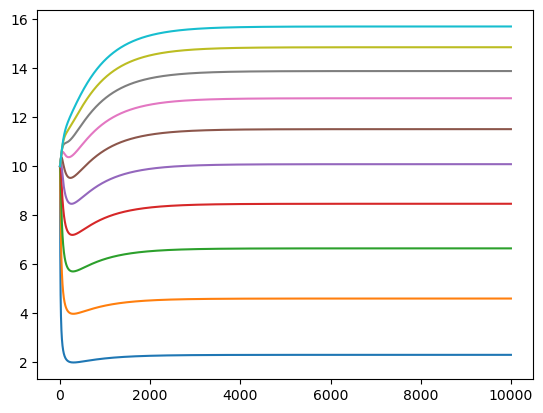

In [166]:
plt.plot(T[:,0:10:])

In [86]:
Tsurf

array([30.        , 29.66292135, 29.3258427 , 28.98876404, 28.65168539,
       28.31460674, 27.97752809, 27.64044944, 27.30337079, 26.96629213,
       26.62921348, 26.29213483, 25.95505618, 25.61797753, 25.28089888,
       24.94382022, 24.60674157, 24.26966292, 23.93258427, 23.59550562,
       23.25842697, 22.92134831, 22.58426966, 22.24719101, 21.91011236,
       21.57303371, 21.23595506, 20.8988764 , 20.56179775, 20.2247191 ,
       19.88764045, 19.5505618 , 19.21348315, 18.87640449, 18.53932584,
       18.20224719, 17.86516854, 17.52808989, 17.19101124, 16.85393258,
       16.51685393, 16.17977528, 15.84269663, 15.50561798, 15.16853933,
       14.83146067, 14.49438202, 14.15730337, 13.82022472, 13.48314607,
       13.14606742, 12.80898876, 12.47191011, 12.13483146, 11.79775281,
       11.46067416, 11.12359551, 10.78651685, 10.4494382 , 10.11235955,
        9.7752809 ,  9.43820225,  9.1011236 ,  8.76404494,  8.42696629,
        8.08988764,  7.75280899,  7.41573034,  7.07865169,  6.74